## Bibliotecas:

In [127]:
import numpy as np

In [128]:
import matplotlib.pyplot as plt

In [129]:
%matplotlib inline

In [130]:
import glob 

## Fazer uma função que recebe o nome do arquivo de dado como argumento e retorne: a latitude e longitude da estação; o nome da primeira cidade mais próxima da estação de medida 

In [158]:
# Estraindo os arquivos da pasta 'dados'
arquivos = glob.glob("dados/*W-TAVG-Trend.txt")

In [159]:
print (arquivos)

['dados\\0.80S-49.02W-TAVG-Trend.txt', 'dados\\10.45S-48.27W-TAVG-Trend.txt', 'dados\\13.66S-38.81W-TAVG-Trend.txt', 'dados\\15.27S-47.50W-TAVG-Trend.txt', 'dados\\2.41S-60.27W-TAVG-Trend.txt', 'dados\\20.09S-44.36W-TAVG-Trend.txt', 'dados\\20.09S-54.60W-TAVG-Trend.txt', 'dados\\23.31S-42.82W-TAVG-Trend.txt', 'dados\\23.31S-46.31W-TAVG-Trend.txt', 'dados\\24.92S-49.66W-TAVG-Trend.txt', 'dados\\29.74S-51.69W-TAVG-Trend.txt', 'dados\\4.02S-40.98W-TAVG-Trend.txt']


In [195]:
# Definindo uma função para que ela retorne: latitude, longitude e a cidade mais próxima a estação.
# "UTF-8" possiblita o print de caracteres especiais.
# ".split" possibilita a locomoção das palavras na frase.
def localidades (nome):
    documento  = open(nome, encoding = "UTF-8")
    ler = documento.readlines()
    lat_long = ler [4] [1:].strip()
    cidade_prx = ler [35].split(sep = ',')[0][19:]
    
    return (lat_long, cidade_prx )

In [196]:
#teste
cidade = localidades ('./dados/0.80S-49.02W-TAVG-Trend.txt')
print (cidade)

('0.80 S, 49.02 W', 'Belém')


In [197]:
# Executando a função para todos os arquivos da pasta 'dados'.
for arquivo in arquivos [0:11]:
    info = localidades (arquivo)
    print (info)
    

('0.80 S, 49.02 W', 'Belém')
('10.45 S, 48.27 W', 'Palmas')
('13.66 S, 38.81 W', 'Salvador')
('15.27 S, 47.50 W', 'Brasília')
('2.41 S, 60.27 W', 'Manaus')
('20.09 S, 44.36 W', 'Belo Horizonte')
('20.09 S, 54.60 W', 'Campo Grande')
('23.31 S, 42.82 W', 'Rio de Janeiro')
('23.31 S, 46.31 W', 'São Paulo')
('24.92 S, 49.66 W', 'Curitiba')
('29.74 S, 51.69 W', 'Porto Alegre')


## Criar uma função que recebe o nome do arquivo de dado como argumento e retorne: um numpy array da temperatura anual estimada, que será a soma da temperatura absoluta estimada (retirar do cabeçalho do arquivo) com a anomalia anual.

In [173]:
# extraindo as informações dos arquivos da pasta 'dados' 
dados = np.loadtxt (arquivo, comments = '%')

In [187]:
# Definindo a função.
def temp_anual_estimada (temp):
    doc = open (temp)
    anomalia_anual = doc.readlines() [47].split()
    margem = np.array (anomalia_anual [8:9]) [0]
    
    tabela = np.loadtxt (temp, comments = '%') 
    anual_anomaly = tabela [:, 4]
    anomalia_final = np.array (anual_anomaly)
    
    final = []
    for elementos in anomalia_final:
        final.append (float (elementos) + (float (margem)))
    temp_anual_estimada = np.array (final)
    return (temp_anual_estimada)

In [188]:
#teste
temperatura =  temp_anual_estimada ('./dados/0.80S-49.02W-TAVG-Trend.txt')
print(temperatura)

[    nan     nan  25.868 ...,     nan     nan     nan]


In [189]:
for arquivo in arquivos [0:11]:
    soma_temp_absl = temp_anual_estimada (arquivo)
    print (soma_temp_absl)

[    nan     nan  25.868 ...,     nan     nan     nan]
[    nan     nan  25.061 ...,     nan     nan     nan]
[    nan     nan  23.763 ...,     nan     nan     nan]
[    nan     nan  20.847 ...,     nan     nan     nan]
[ nan  nan  nan ...,  nan  nan  nan]
[    nan     nan  20.232 ...,     nan     nan     nan]
[    nan     nan  22.622 ...,     nan     nan     nan]
[    nan     nan  22.961 ...,     nan     nan     nan]
[    nan     nan  18.857 ...,     nan     nan     nan]
[    nan     nan  16.538 ...,     nan     nan     nan]
[    nan     nan  17.306 ...,     nan     nan     nan]


## Faça gráficos da temperatura anual estimada para cada estação da pasta dados referente a uma cidade (não o do Brasil todo), com o título de cada gráfico contendo a latitude e longitude. Os gráficos devem ser salvos com o nome da cidade extraída no item 3 em formato png(caso o nome seja composto, substitua os espaços por _): ex.Porto_Alegre.png.


In [153]:
dado = np.loadtxt ("./dados/0.80S-49.02W-TAVG-Trend.txt" , comments = '%') 
anos = dados [:, 0]
meses = dados[:, 1]

In [154]:
ano_em_decimal = ((meses-1)/12 + anos)

In [155]:
def localidades_1 (nomes):
    documento_1  = open(nomes, encoding = "UTF-8")
    ler_2 = documento_1.readlines()
    lat_long_1 = ler_2 [4] [1:]
    return (lat_long_1)

In [201]:
def graficos (esboço):
    anos = np.loadtxt(esboço, comments = '%') [:, 0]
    meses = np.loadtxt(esboço, comments = '%') [:, 1]
    ano_em_decimal = ((meses-1)/12 + anos)
    anomalia_anual = temp_anual_estimada (esboço)
                      
    plt.figure()
    plt.plot (ano_em_decimal, anomalia_anual, c = "#000000")
    plt.xlabel ("anos")
    plt.ylabel ("Temperatura em °C")
    plt.title (localidades_1 (esboço))
    plt.savefig("Grafico_das_cidades/" + localidades(esboço)[1] +".png", format = 'png')

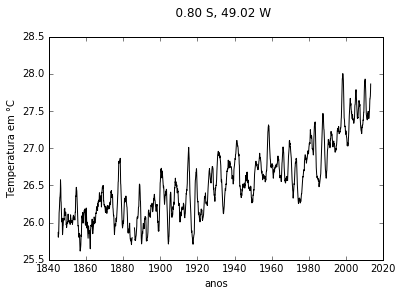

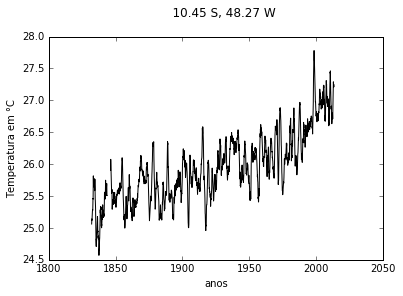

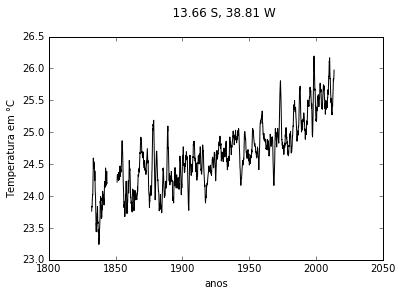

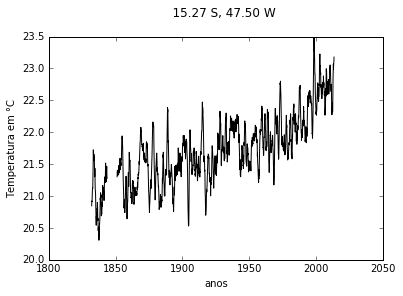

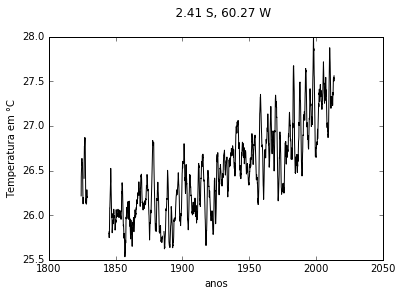

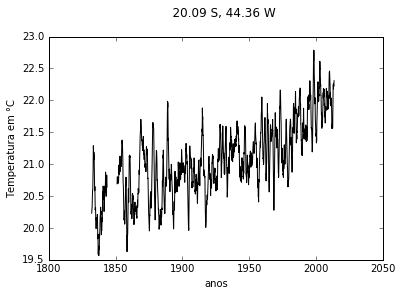

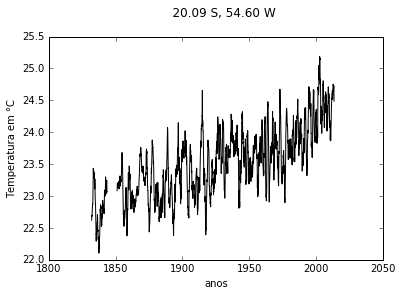

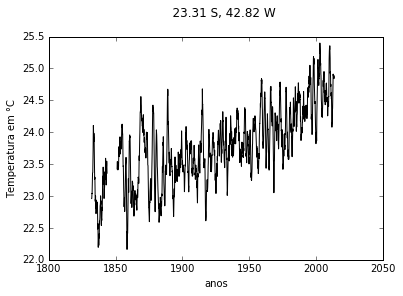

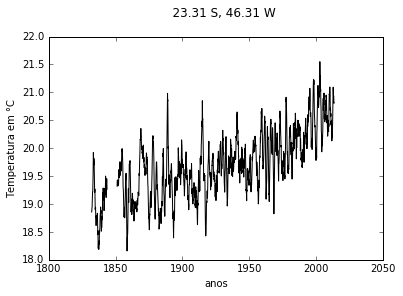

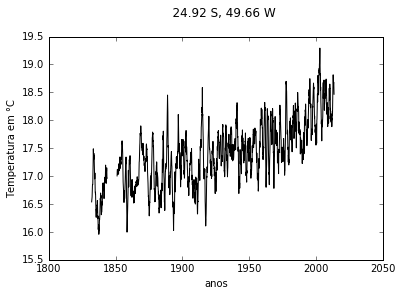

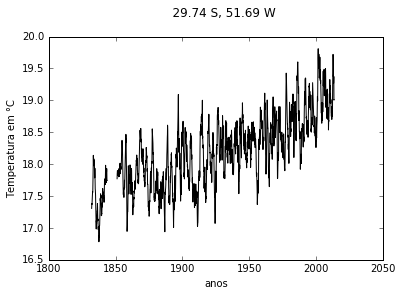

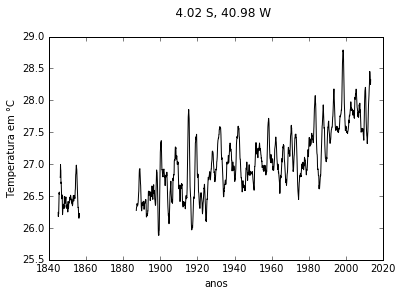

In [191]:
 for arquivo in arquivos:
        graficos (arquivo)